In [69]:
# import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data------------------------------------------
data = pd.read_csv("output/fw1_2020_north_final(afterSQL).csv")

In [3]:
print(data)

            num  startkilo  endkilo  year   date starttime  \
0             0          0      2.0  2020  01/01       0:0   
1             1          0      2.0  2020  01/01       0:5   
2             2          0      2.0  2020  01/01      0:10   
3             3          0      2.0  2020  01/01      0:15   
4             4          0      2.0  2020  01/01      0:20   
...         ...        ...      ...   ...    ...       ...   
5042296  842296         98    100.8  2020  12/31     23:20   
5042297  842297         98    100.8  2020  12/31     23:25   
5042298  842298         98    100.8  2020  12/31     23:30   
5042299  842299         98    100.8  2020  12/31     23:35   
5042300  842300         98    100.8  2020  12/31     23:50   

         startTime_millionSec endtime  endTime_millionSec  crash  ...  \
0                  1577808000     0:5          1577808300      0  ...   
1                  1577808300    0:10          1577808600      0  ...   
2                  1577808600    0:1

# Data pre-process

In [4]:
#drop data
data.drop(['startkilo', 'endkilo', 'year', 'date', 
           'starttime', 'startTime_millionSec', 'endtime', 'endTime_millionSec'], 
          axis=1, inplace=True)
# Since the values of feature "speed limit" are all the same, we drop the feature
data.drop(['speedlimit'], axis=1, inplace=True)
data.drop(['pavement', 'cement', 'remark', 'one'], axis=1, inplace=True)
# unrelated factors
data.drop(['fw1_northcol', 'index'], axis=1, inplace=True)
# drop columns 
data.drop(['minradiuslength',
           'Var_windspeed', 'Var_rain', 'Var_volume', 
           'Var_PCU', 'Var_Speed_volume', 'Var_Speed_PCU'], axis=1, inplace=True)

print(data.columns)

Index(['num', 'crash', 'lane', 'minlane', 'addlane', 'totalwidth', 'lanewidth',
       'inshoulder', 'outshoulder', 'upslope', 'downslope', 'upslopelength',
       'downslopelength', 'maxupslope', 'maxdownslope', 'curvelength',
       'minradius', 'continuouscurve', 'interchange', 'tunnellength',
       'tunnelin', 'tunnelout', 'shouderoallow', 'camera', 'service',
       'windspeed', 'rain', 'volume_S', 'volume_L', 'volume_T', 'volume',
       'PCU', 'Speed_volume', 'Speed_PCU', 'heavy_rate', 'CrashType',
       'DayType', 'PeakHour', 'Hour'],
      dtype='object')


In [5]:
print(data.dtypes)

num                  int64
crash                int64
lane                 int64
minlane              int64
addlane              int64
totalwidth         float64
lanewidth          float64
inshoulder           int64
outshoulder          int64
upslope            float64
downslope          float64
upslopelength        int64
downslopelength      int64
maxupslope         float64
maxdownslope       float64
curvelength          int64
minradius            int64
continuouscurve      int64
interchange          int64
tunnellength         int64
tunnelin             int64
tunnelout            int64
shouderoallow        int64
camera               int64
service              int64
windspeed          float64
rain               float64
volume_S             int64
volume_L             int64
volume_T             int64
volume               int64
PCU                float64
Speed_volume         int64
Speed_PCU            int64
heavy_rate         float64
CrashType           object
DayType              int64
P

### data['rain'] has many non-numeric values: "&", try to fix them

In [20]:
# data['rain'] has many non-numeric values: "&", try to fix them -> 20220707 has fixed this. 
# data['rain'] = pd.to_numeric(data['rain'], errors='coerce').fillna(0, downcast='float')
# data['windspeed'] = pd.to_numeric(data['windspeed'], errors='coerce').fillna(0, downcast='float')
# data['Speed_volume'] = pd.to_numeric(data['Speed_volume'], errors='coerce').fillna(0, downcast='float')
# data['Speed_PCU'] = pd.to_numeric(data['Speed_PCU'], errors='coerce').fillna(0, downcast='float')
# data['heavy_rate'] = pd.to_numeric(data['heavy_rate'], errors='coerce').fillna(0, downcast='float')

print(data.dtypes)

num                   int64
crash              category
lane                  int64
minlane            category
addlane            category
totalwidth          float64
lanewidth           float64
inshoulder            int64
outshoulder           int64
upslope             float64
downslope           float64
upslopelength         int64
downslopelength       int64
maxupslope          float64
maxdownslope        float64
curvelength           int64
minradius             int64
continuouscurve    category
interchange        category
tunnellength          int64
tunnelin           category
tunnelout          category
shouderoallow      category
camera             category
service            category
windspeed           float64
rain                float64
volume_S              int64
volume_L              int64
volume_T              int64
volume                int64
PCU                 float64
Speed_volume          int64
Speed_PCU             int64
heavy_rate          float64
CrashType           

In [21]:
print(data.groupby("CrashType").size())

CrashType
A1          7
A2        278
A3       4273
\N    5037743
dtype: int64


### Convert to categorial type..................

In [23]:
#Convert to categorial type..................
data["crash"] = data["crash"].astype("category") 
## !!!!! WARNING!!! ordered = True means the variable is ordered, which means it can be compared. 
## Otherwise, it can not be compared. 
data["minlane"] = data["minlane"].astype("category")
data["addlane"] = data["addlane"].astype("category")
data["continuouscurve"] = data["continuouscurve"].astype("category")
data["interchange"] = data["interchange"].astype("category")
data["tunnelin"] = data["tunnelin"].astype("category")
data["tunnelout"] = data["tunnelout"].astype("category")
data["shouderoallow"] = data["shouderoallow"].astype("category")
data["camera"] = data["camera"].astype("category")
data["service"] = data["service"].astype("category")
data["DayType"] = data["DayType"].astype("category")
data["PeakHour"] = data["PeakHour"].astype("category")
data["Hour"] = data["Hour"].astype("category")

## Correlation heatmap 變數相關性確認

In [12]:
roadGeometryRelatedData = pd.concat([data['lane'], data['totalwidth'], data['lanewidth'],
                                     data['inshoulder'], data['outshoulder'], data['upslopelength'],
                                     data['downslopelength'], data['maxupslope'], data['maxdownslope'], 
                                     data['curvelength'], data['minradius'], data['tunnellength']], axis=1)
trafficFlowRelatedData = pd.concat([data['PCU'], data['volume'], data['volume_S'], data['volume_T'], data['volume_L'], data['heavy_rate']], axis=1) 
weatherRelatedData = pd.concat([data['windspeed'], data['rain']], axis=1)

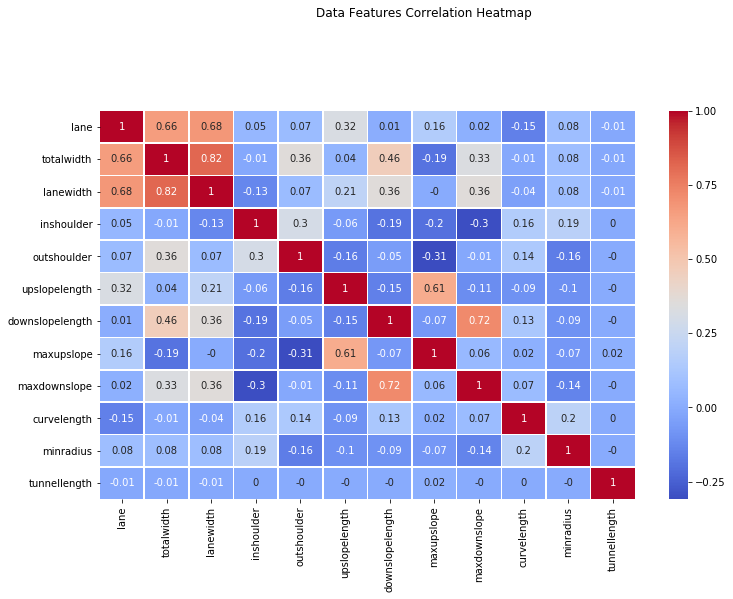

<Figure size 864x864 with 0 Axes>

In [13]:
# draw a heatmap -> roadGeometryRelatedData
corr = roadGeometryRelatedData.corr()
f, ax = plt.subplots(figsize=(12, 8))

plt.figure(figsize=(len(roadGeometryRelatedData.columns), len(roadGeometryRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.5)
f.subplots_adjust(top=0.8)
ax.set_ylim(12, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=12)
plt.show() #畫出熱力圖

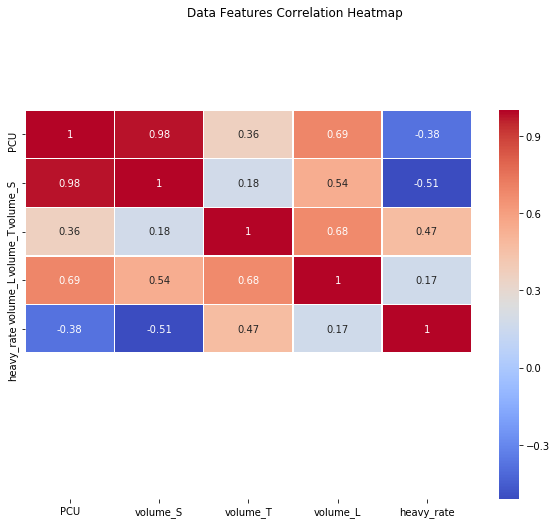

<Figure size 360x360 with 0 Axes>

In [24]:
# draw a heatmap -> trafficRelatedData
corr = trafficFlowRelatedData.corr()
f, ax = plt.subplots(figsize=(10, 8))

plt.figure(figsize=(len(trafficFlowRelatedData.columns), len(trafficFlowRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.5)
f.subplots_adjust(top=0.8)
ax.set_ylim(8, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=12)
plt.show() #畫出熱力圖

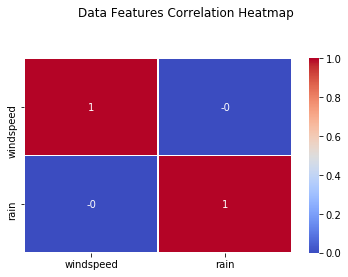

<Figure size 144x144 with 0 Axes>

In [27]:
# draw a heatmap -> trafficRelatedData
corr = weatherRelatedData.corr()
f, ax = plt.subplots(figsize=(6, 4))

plt.figure(figsize=(len(weatherRelatedData.columns), len(weatherRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.5)
f.subplots_adjust(top=0.8)
ax.set_ylim(2, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=12)
plt.show() #畫出熱力圖

### by correlation analysis results, we delete data['Speed_volume'], data['volume_S'], data['volume_L'] and data['volume_T'] 

In [ ]:
# data.drop(['Speed_volume', 'volume_S', 'volume_T', 'volume_L'], axis=1, inplace=True)

# Before AI prediciton model: Seperare X and Y

### Select features that are used in the model into a list

In [9]:
#Select features that are used in the model into a list
features = list(data.columns)
for feature in ['crash', 'CrashType', 'Speed_volume', 'Speed_PCU']:
    features.remove(feature)#Remove features
    
print(features)

['num', 'lane', 'minlane', 'addlane', 'totalwidth', 'lanewidth', 'inshoulder', 'outshoulder', 'upslope', 'downslope', 'upslopelength', 'downslopelength', 'maxupslope', 'maxdownslope', 'curvelength', 'minradius', 'continuouscurve', 'interchange', 'tunnellength', 'tunnelin', 'tunnelout', 'shouderoallow', 'camera', 'service', 'windspeed', 'rain', 'volume_S', 'volume_L', 'volume_T', 'volume', 'PCU', 'heavy_rate', 'DayType', 'PeakHour', 'Hour']


### (OPTION) Sample Data

In [10]:
data_sample = data.sample(n=1000)

CrashType
A3      1
\N    999
dtype: int64

### Seperate X and Y data

In [19]:
no_crash = data_sample[data_sample.crash==0]
crash = data_sample[data_sample.crash==1]

TypeError: Unordered Categoricals can only compare equality or not

In [13]:
data_Y = data_sample['crash']
data_X = data_sample[features]

In [17]:
print(data_Y)

3165810    0
1245738    0
4057613    0
3670550    0
820379     0
          ..
2490119    0
1569404    0
307073     0
691777     0
2432992    0
Name: crash, Length: 1000, dtype: category
Categories (4, int64): [0, 1, 2, 3]


###  DO NOT NEED TO MANUALLY CONVERT FEATURES INTO DUMMY VARIABLES
* all categorial types will automatically convert to categorial variable 

In [14]:
print(f"X = {data_X.columns}")

X = Index(['num', 'lane', 'minlane', 'addlane', 'totalwidth', 'lanewidth',
       'inshoulder', 'outshoulder', 'upslope', 'downslope', 'upslopelength',
       'downslopelength', 'maxupslope', 'maxdownslope', 'curvelength',
       'minradius', 'continuouscurve', 'interchange', 'tunnellength',
       'tunnelin', 'tunnelout', 'shouderoallow', 'camera', 'service',
       'windspeed', 'rain', 'volume_S', 'volume_L', 'volume_T', 'volume',
       'PCU', 'heavy_rate', 'DayType', 'PeakHour', 'Hour'],
      dtype='object')


In [15]:
data_X.fillna(0, inplace=True)

C:\Users\WangRabbit\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [68]:
data_X.isna().any()

num                False
lane               False
minlane            False
addlane            False
totalwidth         False
lanewidth          False
inshoulder         False
outshoulder        False
upslope            False
downslope          False
upslopelength      False
downslopelength    False
maxupslope         False
maxdownslope       False
curvelength        False
minradius          False
continuouscurve    False
interchange        False
tunnellength       False
tunnelin           False
tunnelout          False
shouderoallow      False
camera             False
service            False
windspeed          False
rain               False
volume_S           False
volume_L           False
volume_T           False
volume             False
PCU                False
heavy_rate         False
DayType            False
PeakHour           False
Hour               False
dtype: bool

# Prediction: SVM

In [16]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1)
accuracy = cross_val_score(svc,data_X,data_Y,cv=5,scoring="accuracy")
F1 = cross_val_score(svc,data_X,data_Y,cv=5,scoring="f1")
precision = cross_val_score(svc,data_X,data_Y,cv=5,scoring="precision")
recall = cross_val_score(svc,data_X,data_Y,cv=5,scoring="recall")

print("accuracy = ",accuracy)
print("accuracy_mean = ",accuracy.mean())
print("F1 = ",F1)
print("precision = ",precision)
print("recall = ",recall)

C:\Users\WangRabbit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\WangRabbit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: The number of classes has to be greater than one; got 1 class

# Prediction: Linear Regression

### convert crash values to 1

In [ ]:
# replace crash values
## convert crash values to 1
data.loc[data["crash"] >= 1, "crash"] = 1 

### convert it to .. 

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
model=sm.Logit(y_train,X_train,random_state=0)
result=model.fit()
print(result.summary())

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))